**Instructors**: Prof. Keith Chugg (chugg@usc.edu) & Prof. Antonio Ortega (aortega@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu) and Prof. Keith Chugg (chugg@usc.edu)

# Probability Theory

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
# from collections import Counter

## Definitions
**Experiment**: Any process or procedure for which more than one outcome is possible

**Sample Space** $\Omega$: All the possible outcomes

**Probability** $P(x_i)$ meet the requirement: $0\leq p_i\leq 1, i=1, 2, \dots, n$ and $p_1 + p_2 + \dots + p_n = 1$

**Event** $A$: An event is a subset of the sample space. The probability of an event is obtained by the probabilities of the outcomes contained within the event.

$$P(A) = \sum P(x), x\in A$$

**Complements** $A^C$: Everything in the sample space not contained within event. 

$$P(A)+P(A^C)=1$$

**Intersection** $A\cap B$: Outcomes within both events $A$ and $B$.

**Union** $A\cup B$: Outcomes within event $A$ or event $B$.

## Some Useful Properties


**Distributive Property of Intersection**: $A\cap (B\cap C) = (A\cap B)\cap C$

**Addition Theorem**: $P(A\cup B) = P(A) + P(B) - P(A\cap B)$

**DeMorgan's Law on Union**: $(A\cup B)^C = A^C \cap B^C$

**DeMorgan's Law on Intersection**: $(A\cap B)C = A^C \cup B^C$

**Conditional Probability**: $P(A|B) = \frac{P(A\cap B)}{P(B)} , P(B)>0$

**Multiplication Theorem**: $P(A\cap B) = P(B)P(A|B)$

- In general, for a sequence of events $A_1, A_2, \cdots, A_n$:
\begin{equation}
    P(A_1 \cap A_2 \cap \cdots \cap A_n) = P(A_1)P(A_2 \mid A_1)P(A_3 \mid A_1 \cap A_2) \cdots P(A_n \mid A_1 \cap \cdots \cap A_{n-1})
\end{equation}

**Independence of Events**: 

1. $P(A|B) = P(A)$

2. $P(B|A) = P(B)$

3. $P(A\cap B) = P(A)P(B)$

**Total Probability**:

Given $\{ A_1, A_2, \cdots, A_n \}$ a partition of sample space $S$, the probability of an event $B$, $P(B)$ can be expressed as:
\begin{equation}
    P(B) = \sum_{i=1}^n P(A_i)P(B \mid A_i)
\end{equation}

**Bayes Theorem**

Given $\{ A_1, A_2, \cdots, A_n \}$ a partition of a sample space, then the posterior probabilities of the event $A_i$ conditional on an event $B$ can be obtained from the probabilities $P(A_i)$ and $P(A_i \mid B)$ using the formula:
\begin{equation}
    P(A_i \mid B) = \frac{P(A_i)P(B \mid A_i)}{\sum_{j=1}^n P(A_j)P(B \mid A_j)}
\end{equation}

## Random Variables

**Random variable** $X: \Omega\to R$, from sample space to real line (as the domian of probability function).

**Probability functions** $P(x): R\to [0, 1]$, from real line to a probability.

### Discrete Random Variables

Discrete random variables
- **Probability Mass Function (p.m.f.)**
    * $0 \leq p_i \leq 1 \text{ and } \sum_i p_i = 1$
    * Probability: $P(X = x_i) = p_i$
    
- **Cumulative Distribution Function (c.d.f.)**
    * $F(x) = P(X \leq x)$
- **Expectation**:
    * $E(X) = \sum_i p_ix_i$
- **Variance**:
    $$Var(X) = E(X-E(X))^2 = E(X^2) - E(X)^2$$

#### Bernoulli Distribution

 - The random experiment only has two outcomes: success $x=1$ and failure $x=0$.
 - $p$ is the success probability
 - $X\sim Ber(p): P(X=x)=p^x(1-p)^{1-x} \quad x=0,1$

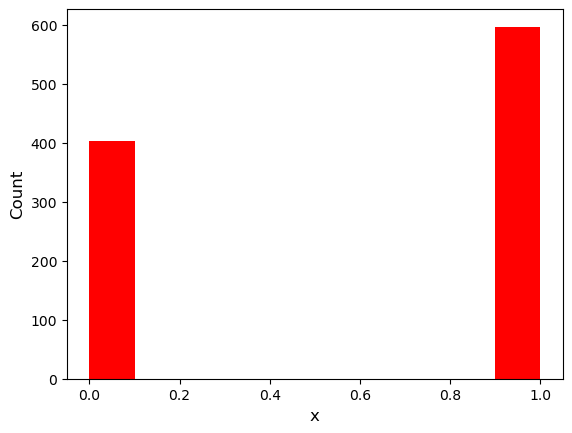

In [2]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=1000,p=0.6)
# plt.bar(Counter(data_bern).keys(), Counter(data_bern).values(), width = 0.1, color='red')
plt.hist(data_bern, color='red')
plt.xlabel('x', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### Binomial Distribution

 - The random experiment is repeated $n$ times independently, with only two outcomes: success ($x=1$) and failure ($x=0$)
 - $X\sim B(n, p): f(x;n, p) = C_x^n p^x(1-p)^{n-x}, x=0,1, 2, \dots, n$

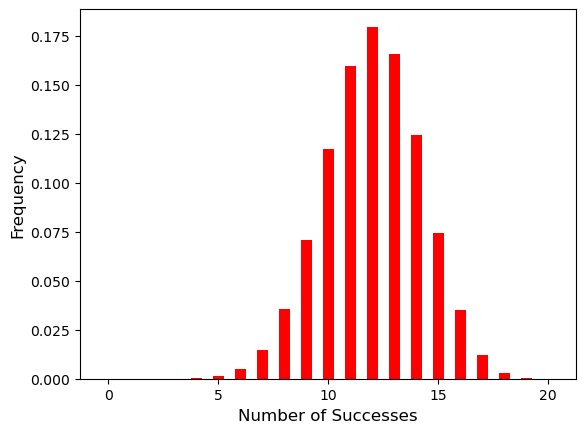

In [3]:
from scipy.stats import binom
n = 20
p = 0.6
r_values = list(range(n + 1))
dist = [binom.pmf(r, n, p) for r in r_values ] 
plt.bar(r_values, dist, width = 0.5, color='red')
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### Geometric Distribution

- Represents the random of experiments $x$ until one success
- $X\sim G(p):f(x;p) = (1-p)^{x-1}p, x=1, 2, \dots, \infty$

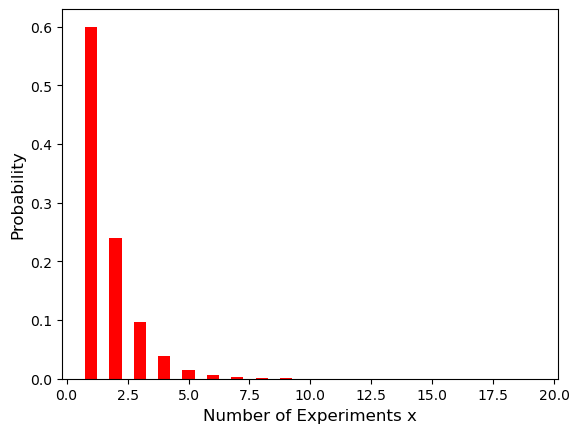

In [8]:
from scipy.stats import geom
X = np.arange(1,20)
p = 0.6
geom_pd = geom.pmf(X, p)
plt.bar(X, geom_pd, width = 0.5, color='red')
plt.ylabel("Probability", fontsize="12")
plt.xlabel("Number of Experiments x", fontsize="12")
plt.show()

#### Negative Binomial Distribution

- Represents the total number of experiments $x$ required to have $r$ successes
- $X\sim NB(n, p):f(x;n, p) = C_{r-1}^{x-1}p^{r}(1-p)^{x-r}, x=1, 2, \dots, \infty$

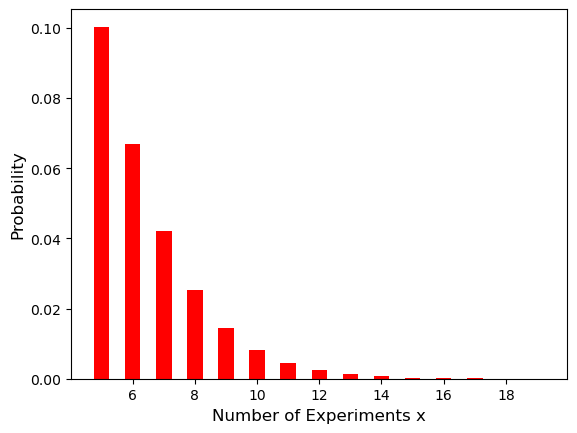

In [9]:
from scipy.stats import nbinom
r = 5
X = np.arange(r, 20)
p = 0.6
nbinom_pd = nbinom.pmf(X, r, p)
plt.bar(X, nbinom_pd, width = 0.5, color='red')
plt.ylabel("Probability", fontsize="12")
plt.xlabel("Number of Experiments x", fontsize="12")
plt.show()

#### Multinomial Distribution

- Nominal distribution with $k$ outputs, each output have the probability $p_i, i=1, 2, \dots, k$, the variables are the number of times of output $x_i, i=1, 2, \dots, k$.

- $f(x_1, x_2, \dots, x_k;p_1, p_2, \dots, p_k, n) = C_{n}^{x_1, x_2, \dots, x_k}p_1^{x_1}p_2^{x_2}\dots p_k^{x_k} \quad \sum_{i=1}^{k}x_i=n, \sum_{i=1}^{k}p_i=1$

In [5]:
# Throw a dice 10 times
x = np.random.multinomial(20, [1/6.]*6, size=1)
outcomes = x[0]
c = 0
for i in outcomes:
    print('It landed', i, 'times on face', c+1)
    c = c+1
print('Total Number of Experiments: ', sum(outcomes))

It landed 8 times on face 1
It landed 0 times on face 2
It landed 1 times on face 3
It landed 3 times on face 4
It landed 5 times on face 5
It landed 3 times on face 6
Total Number of Experiments:  20


#### Poisson Distribution

- Models the number of arrivals $x$ (number of customers, number of phone calls, etc.)
- $X\sim Pois(\lambda): f(x;\lambda) = \frac{e^{-\lambda}\lambda^x}{x!}, x=0, 1, 2, \dots, \infty$

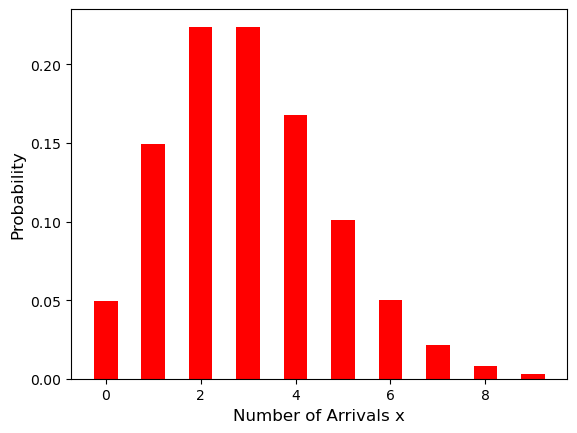

In [11]:
from scipy.stats import poisson
X = np.arange(0,10)
lambdaParameter = 3
poisson_pd = poisson.pmf(X, lambdaParameter)
plt.bar(X, poisson_pd, width = 0.5, color='red')
plt.ylabel("Probability", fontsize="12")
plt.xlabel("Number of Arrivals x", fontsize="12")
plt.show()

#### Hypergeometric Distribution

- Choose $n$ items from $N$ items without replacement, within the $N$ items, there are $N_1$ items in one type and the rest is from another type. We want to get $x$ items of one type

- $X\sim Hypergeometric(N, n, r): f(x;N, n, r) = \frac{C_x^{N_1}C_{n-x}^{N-N_1}}{C_N^n}$

In [12]:
from scipy.stats import hypergeom

Suppose we have a collection of 20 cars, of which 7 are BMW. Then if we want to know the probability of finding a given number of BMW if we choose at random 10 of the 20 cars

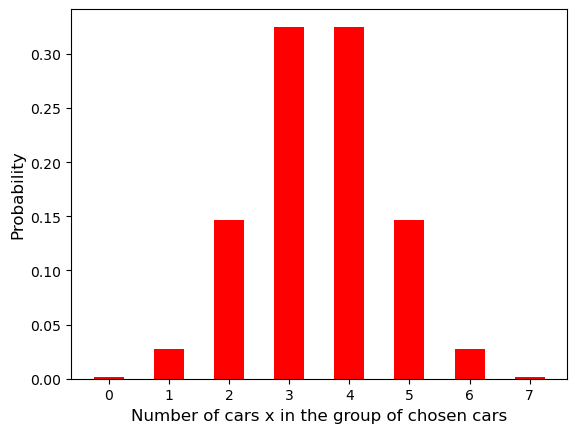

In [13]:
[M, n, N] = [20, 7, 10]
rv = hypergeom(M, n, N)
X = np.arange(0, n+1)
pmf_cars = rv.pmf(X)
plt.bar(X, pmf_cars, width = 0.5, color='red')
plt.ylabel("Probability", fontsize="12")
plt.xlabel("Number of cars x in the group of chosen cars", fontsize="12")
plt.show()

### Continuous Random Variables

Continous random variables
- **Probability Density Function (p.d.f.)**
    * $f(x) \geq 0$

    * $\int_{-\infty}^{\infty} f(x) dx = 1$

- **Cumulative Distribution Function (c.d.f.)**
    * $F(x) = P(X \leq x)$
- **Expectation**
    * $E(X) = \int_{-\infty}^{\infty}xf(x)dx$
- **Variance**
     $$Var(X) = E(X-E(X))^2 = E(X^2) - E(X)^2$$

#### Uniform Distribution
- The distribution describes an experiment where there is an arbitrary outcome that lies between certain bounds
- $X\sim U(a, b):f(x;a, b) = \frac{1}{b-a}, a\leq x\leq b$

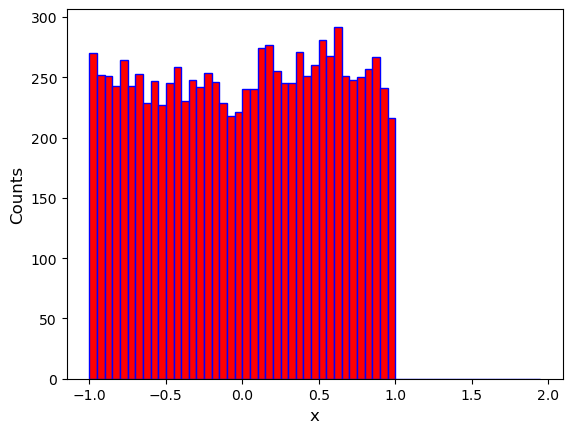

In [14]:
size = 10000
a = -1
b = 1
sample = np.random.uniform(a, b, size)
bin = np.arange(-1,2,0.05) 
plt.hist(sample, bins=bin, color = 'red', edgecolor = 'blue') 
plt.ylabel("Counts", fontsize="12")
plt.xlabel("x", fontsize="12")
plt.show()


#### Gamma Distribution
 - It is a two-parameter family of continuous probability distributions.
 - $X\sim Gam(k, \lambda):f(x;k, \lambda) = \frac{\lambda^k}{\Gamma(k)}x^{k-1}e^{-\lambda x}, x>0, \quad\Gamma(k) = \int_{0}^{\infty}x^{k-1}e^{-x}dx, k>0$

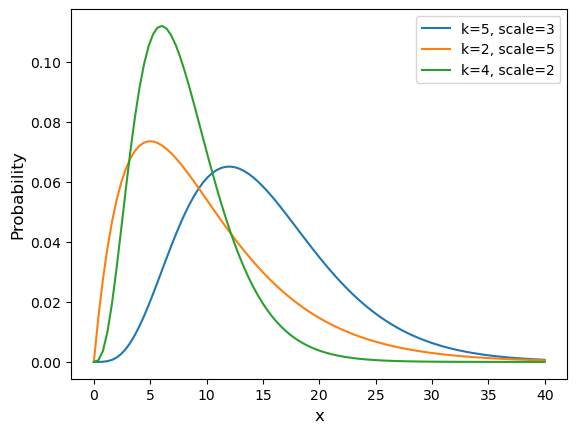

In [15]:
from scipy.stats import gamma
x = np.linspace(0, 40, 100)
a1 = 5; scale1 = 3
a2 = 2; scale2 = 5
a3 = 4; scale3 = 2

y1 = gamma.pdf(x, a=5, scale=3)
y2 = gamma.pdf(x, a=2, scale=5)
y3 = gamma.pdf(x, a=4, scale=2)

#add lines for each distribution
#scale = 1/lambda
plt.plot(x, y1, label='k={}, scale={}'.format(a1,scale1))
plt.plot(x, y2, label='k={}, scale={}'.format(a2,scale2))
plt.plot(x, y3, label='k={}, scale={}'.format(a3,scale3))
plt.legend()
plt.ylabel("Probability", fontsize="12")
plt.xlabel("x", fontsize="12")

plt.show()

#### Beta Distribution
- The Beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parameterized by two positive shape parameters, denoted by $\alpha$ and $\beta$
- Useful for modeling proportions and personal probability
- $X\sim Beta(\alpha, \beta):f(x;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}, 0<x<1$

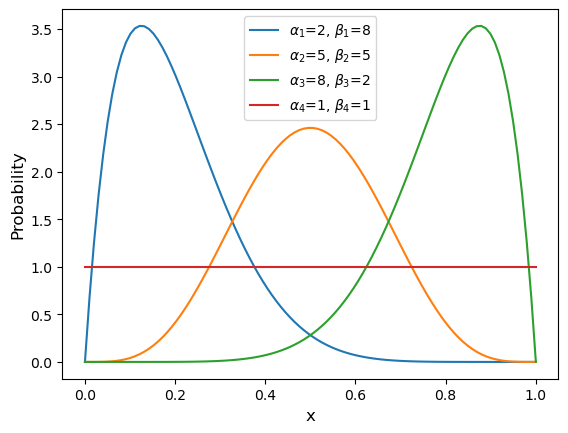

In [6]:
from scipy.stats import beta
a1, b1 = 2, 8
x1 = np.linspace(beta.ppf(0, a1, b1),beta.ppf(1, a1, b1), 100)
a2, b2 = 5, 5
x2 = np.linspace(beta.ppf(0, a2, b2),beta.ppf(1, a2, b2), 100)
a3, b3 = 8, 2
x3 = np.linspace(beta.ppf(0, a3, b3),beta.ppf(1, a3, b3), 100)
a4, b4 = 1, 1
x4 = np.linspace(beta.ppf(0, a4, b4),beta.ppf(1, a4, b4), 100)
plt.plot(x1, beta.pdf(x1, a1, b1), label=r'$\alpha_1$={}, $\beta_1$={}'.format(a1,b1))
plt.plot(x2, beta.pdf(x2, a2, b2), label=r'$\alpha_2$={}, $\beta_2$={}'.format(a2,b2))
plt.plot(x3, beta.pdf(x3, a3, b3), label=r'$\alpha_3$={}, $\beta_3$={}'.format(a3, b3))
plt.plot(x4, beta.pdf(x4, a4, b4), label=r'$\alpha_4$={}, $\beta_4$={}'.format(a4, b4))
plt.ylabel("Probability", fontsize="12")
plt.xlabel("x", fontsize="12")
plt.legend()
plt.show()

#### Normal Distribution
- Called the Gaussian distribution $N( \mu, \sigma)$:
    $$f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \sigma } e ^{- \frac{(x - \mu) ^2}{2 \sigma ^2}}$$
- $\mu$ is the mean and $\sigma$ the standard deviation of the distribution, and $\sigma^2$ is its variance
- Symmetric about $\mu$

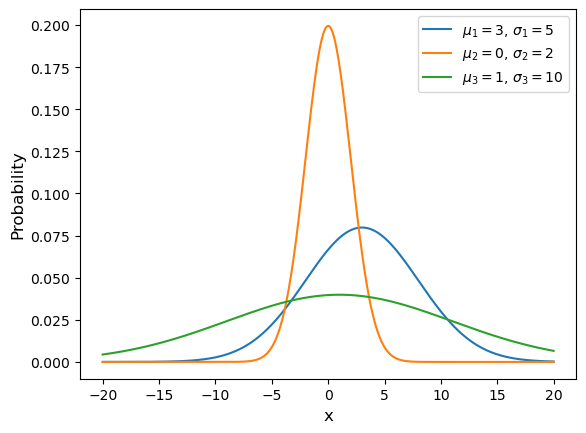

In [10]:
from scipy.stats import norm
mu1 = 3; std1= 5
mu2 = 0; std2= 2
mu3 = 1; std3= 10
x = np.linspace(-20, 20, 1000)
rv1 = norm(mu1, std1)
plt.plot(x, rv1.pdf(x), label = r'$\mu_1 = {}$, $\sigma_1 = {}$'.format(mu1,std1))
rv2 = norm(mu2, std2)
plt.plot(x, rv2.pdf(x), label = r'$\mu_2 = {}$, $\sigma_2 = {}$'.format(mu2,std2))
rv3 = norm(mu3, std3)
plt.plot(x, rv3.pdf(x), label = r'$\mu_3 = {}$, $\sigma_3 = {}$'.format(mu3,std3))
plt.ylabel("Probability", fontsize="12")
plt.xlabel("x", fontsize="12")
plt.legend()
plt.show()

#### Chi-Square Distribution
- $X_i \sim N(0,1)$ and $Y = \sum_{i =1}^ r X_i ^2$, and $X_i$ are independent. Then $Y \sim \chi_r^2$ where $r$ is called the degree of freedom of the distribution
- Probability distribution function:
\begin{equation}
    f(y) = \frac{ \frac{1}{2} e ^ {\frac{-x}{2}} (\frac{x}{2} ) ^ { \frac{r}{2} -1} } { \Gamma( \frac {r}{2} )}
\end{equation}

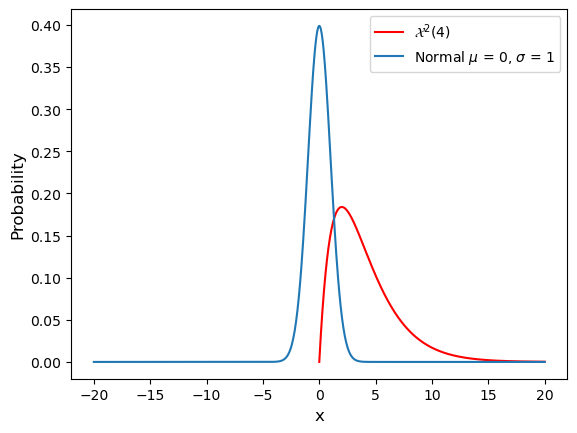

In [15]:
from scipy.stats import chi2
x = np.arange(0, 20, 0.001)
r = 4
plt.plot(x, chi2.pdf(x, df=r), '-r', label = r'$\mathcal{X}^2$' + '({})'.format(r))
mu = 0; std= 1
rv = norm(mu, std)
x_normal = np.linspace(-20, 20, 1000)
plt.plot(x_normal, rv.pdf(x_normal), label = r'Normal $\mu$ = {}, $\sigma$ = {}'.format(mu, std))
plt.xlabel("x", fontsize="12")
plt.ylabel("Probability", fontsize="12")
plt.legend()
plt.show()

### Jointly Distributed Random Variables

- Discrete: 
\begin{equation}   
    P(X = x_i, Y = y_j) = p_{ij} \geq 0 \text{ where } \sum_i \sum_j p_{ij} = 1
\end{equation}

- Continuous: 
\begin{equation}
    f(x,y) \geq 0 \text{ where } \int \int f(x,y) dxdy= 1
\end{equation}

### Marginal probability distribution

- Discrete:
    $$   P(X = x_i) = \sum_j p_{ij}$$
- Continuous:
    $$  f_X(x) = \int_{- \infty}^{\infty} f(x,y)dy$$

### Conditional Probability
- Discrete:
    $$  f_{X \mid Y}(x_i \mid y_i) = P(X = x_i \mid Y = y_j) = \frac{P(X = x_i, Y = y_j)}{P(Y = y_j)}$$
- Continuous:
    $$  f_{X \mid Y}(x \mid y) = \frac{f(x,y)}{f_Y(y)}$$

### Expectation of Functions of Random Variables
- Discrete:  
        $$E(g(X,Y)) = \sum_{x,y} g(x,y)f(x,y)$$
- Continuous: 
        $$E(g(X,Y)) = \int_{- \infty}^{\infty} \int_{- \infty}^{\infty} g(x,y)f(x,y)dxdy$$

### Independence 

- When two random variables $X$ and $Y$ satisfy:
    $$f(x,y) = f_X(x)f_Y(y) \quad \forall x \forall y$$

- Another property: 
    $$E(XY) - E(X)E(Y)$$

### Covariance & Correlation

**Covariance**: $Cov(X, Y) = E(XY) - E(X)E(Y)$

**Correlation**: $Corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X)Var(Y)}}$

### Some Useful Properties

- **Linearity of Expectation**: 
    * $E(aX+b) = aE(X) + b$
    * $E(X_1+X_2) = E(X_1) + E(X_2)$

- **Variance Properties**:
    *  $Var(aX+b) = a^2Var(X)$
    * $Var(X_1+X_2) = Var(X_1) + Var(X_2) + 2Cov(X_1, X_2)$

#### Multivariate Normal Distribution
- Bivariate normal distribution for $(X,Y)$ with parameters $\mu_1 , \mu_2 , \sigma_1^2 , \sigma_2^2 $
- Variables are: $\mu_X = E(X), \mu_Y = E(Y) , \sigma_X^2 = Var(X)  , \sigma_Y^2 = Var(Y) , \rho = Corr(X,Y)$
- Joint probability distribution function of $(X,Y)$:
\begin{equation}
    f(x,y) = \frac{1}{2 \pi \sigma_X \sigma_Y \sqrt{ 1- \rho ^2} } e^ { \left( - \frac{1}{2 (1 - \rho^2)} \left[ x^2 + y^2 -2 \rho xy \right] \right) } \text{ for } x< \infty, y < \infty
\end{equation}

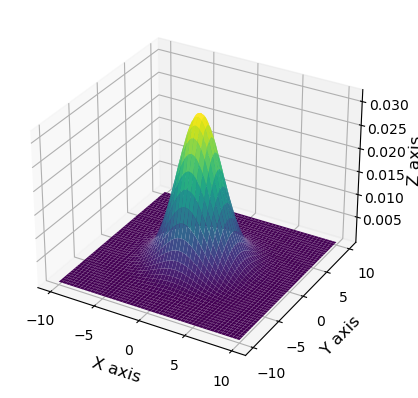

In [21]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
mu_x = 0; variance_x = 5
mu_y = 0; variance_y = 5
limit = 10
x = np.linspace(-limit,limit,500)
y = np.linspace(-limit,limit,500)
X, Y = np.meshgrid(x,y)
pos = np.zeros((X.shape[0],X.shape[1],2))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis', fontsize = 12)
ax.set_ylabel('Y axis', fontsize = 12)
ax.set_zlabel('Z axis', fontsize = 12)
plt.show()

## Law of Large Numbers
In this workbook we explore the sum of uncorrelated or, more strongly, independent random variables.  This leads to two of the main results bridging probability and statistics: the **Law of Large Numbers (LLN)** and the **Central Limit Theorem (CLT)**.

We have explored numerical results that lead to the LLNs several time sin the class, but let's do that again.  Also, let's look at some results that illustrate the CLT.

## Experiments Demonstrating the Law of Large Numbers
Let's generate the some iid random numbers from a given distribution and investigate the sample mean and sample variance behaivor.  Here we are generating realizations of the iid random variables $X_i(u)$ according to some distribution.  Then, we are forming the estimates of the mean and variance:

$\hat{M}_n(u) = \frac{1}{n} \sum_{i=1}^n X_i(u)$

$\hat{S}^2_n(u) = \frac{1}{n} \sum_{i=1}^n (X_i(u) - \hat{M}_n(u))^2$

In the following we plot sample realizations of these quantities for various distributions on $X_i(u)$. 

In [22]:
def plot_means_vars(data, m, sigma_sq):
    (N_trials, N_samples_per_trial) = data.shape
    means = np.zeros((N_trials, N_samples_per_trial))
    vars = np.zeros((N_trials, N_samples_per_trial))
    for n in range(N_samples_per_trial):
        means[:, n] = np.mean(data[:, : n + 1], axis=1)  ## np.mean takes the arithmetic average
        vars[:, n] = np.var(data[:, : n + 1], axis=1)    ## np.var computes data-average squared deviation from the mean
    
    x_range = np.arange(N_samples_per_trial) + 1

    ### plot the sample mean paths
    plt.figure(figsize = (12, 9))
    N_lln = 5
    for i in range(N_lln):
        plt.plot(x_range, means[i], linewidth = 0.5)
    plt.axhline(y = m, c = 'r', linewidth = 2)
    axes = plt.gca()
    axes.set_xlabel('Number of Samples')
    axes.set_ylabel('Sample Mean')
    plt.title(f'Sample Mean Paths of {N_lln} trials, mean = {m}')

    ### plot some histogram slices
    '''
    slices = [4, N_samples_per_trial // 4 - 1, N_samples_per_trial // 2 - 1, N_samples_per_trial - 1]
    N_plots = len(slices)
    fig, ax = plt.subplots(N_plots, sharex=True, figsize=(10,10))
    for i, n0 in enumerate(slices):
        _ = ax[i].hist(means[:, n0], bins=30, edgecolor = 'red', label = f'at {n0 + 1} samples')
        ax[i].legend()

    ### plot the sample variance paths
    plt.figure(figsize = (12, 9))
    for i in range(N_lln):
        plt.plot(x_range, vars[i], linewidth = 0.5)
    plt.axhline(y = sigma_sq, c = 'r', linewidth = 2)
    axes = plt.gca()
    axes.set_xlabel('number of samples')
    axes.set_ylabel('sample variance')
    plt.title(f'Sample Variance Paths of {N_lln} trials, variance = {sigma_sq}')

    ### plot some histogram slices
    slices = [4, N_samples_per_trial // 4 - 1, N_samples_per_trial // 2 - 1, N_samples_per_trial - 1]
    N_plots = len(slices)
    fig, ax = plt.subplots(N_plots, sharex=True, figsize=(10,10))
    for i, n0 in enumerate(slices):
        _ = ax[i].hist(vars[:, n0], bins=30, edgecolor = 'red', label = f'with {n0 + 1} samples')
        ax[i].legend()
    '''

In [23]:
N_trials = 1000
N_samples_per_trial = 5000

### Binomial distribution
Let's first check this for the individual distribution being Binomial.

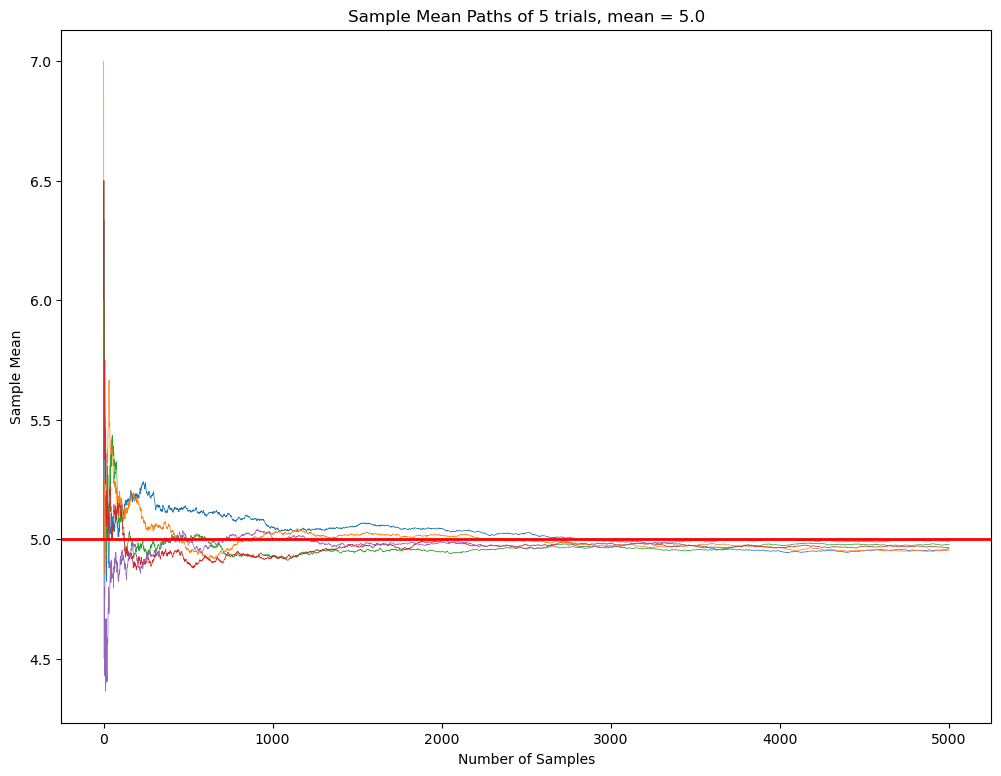

In [24]:
n=10
p=0.5
mean_binomial = n*p
variance_binomial = n*p*(1-p)
data = np.random.binomial(10, 0.5, (N_trials, N_samples_per_trial))
plot_means_vars(data, mean_binomial, variance_binomial)

### Gaussian distribution
Let's check this for the indivdual distribution being Gaussian.

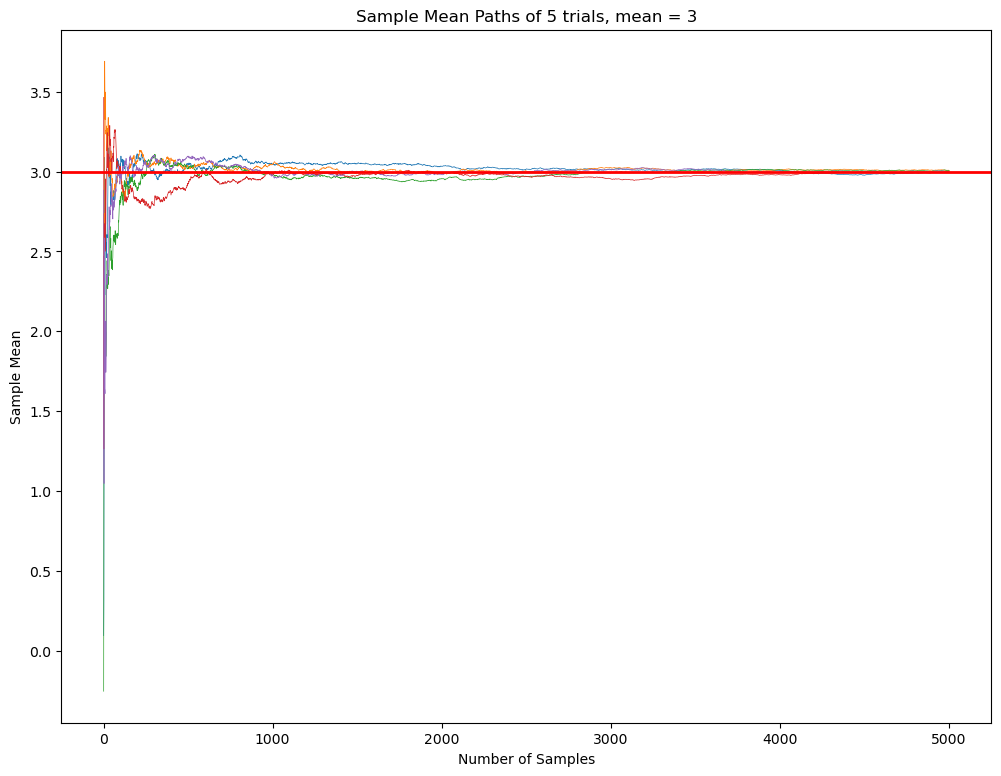

In [25]:
mu = 3
std = 2
data = np.random.normal(mu, std, (N_trials, N_samples_per_trial))
plot_means_vars(data, mu, std**2)

### Uniform Distribution

Let's try a uniform distribution.

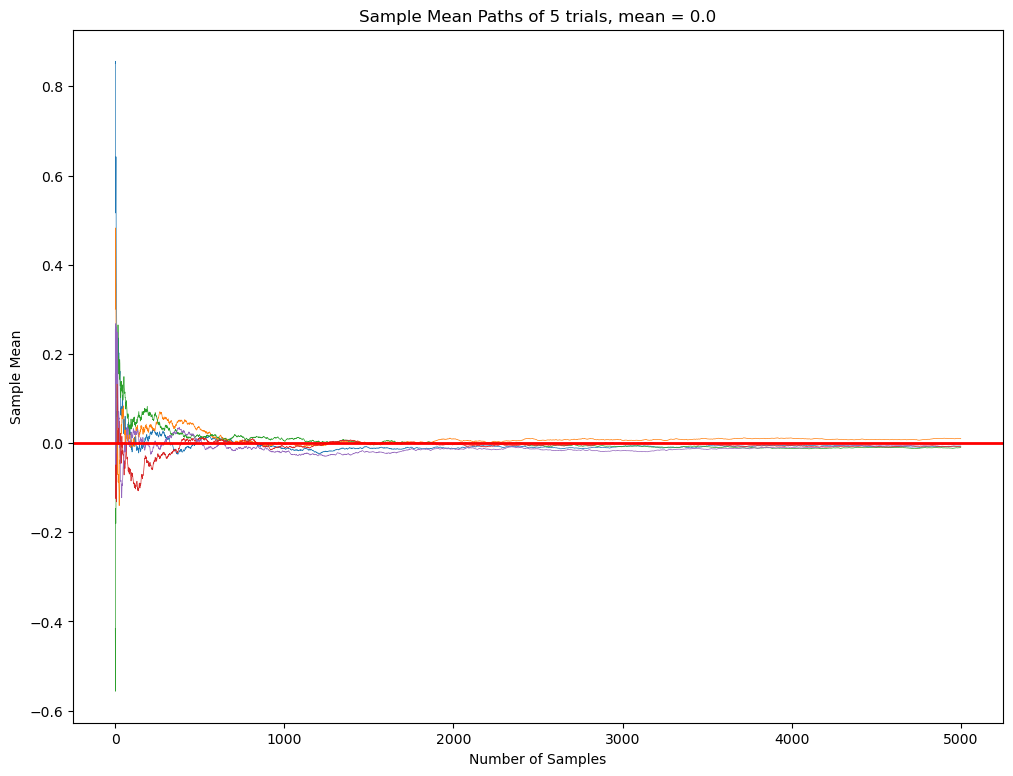

In [26]:
a=1; b=-1
data = np.random.uniform(low= a, high = b, size = (N_trials * N_samples_per_trial,))
data = data.reshape((N_trials, N_samples_per_trial))
plot_means_vars(data, (a+b)/2, (b-a)**2 / 12)

## Central Limit Theorem

The sample mean will approximately be normally distributed for large sample sizes, regardless of the distribution from which we are sampling. 

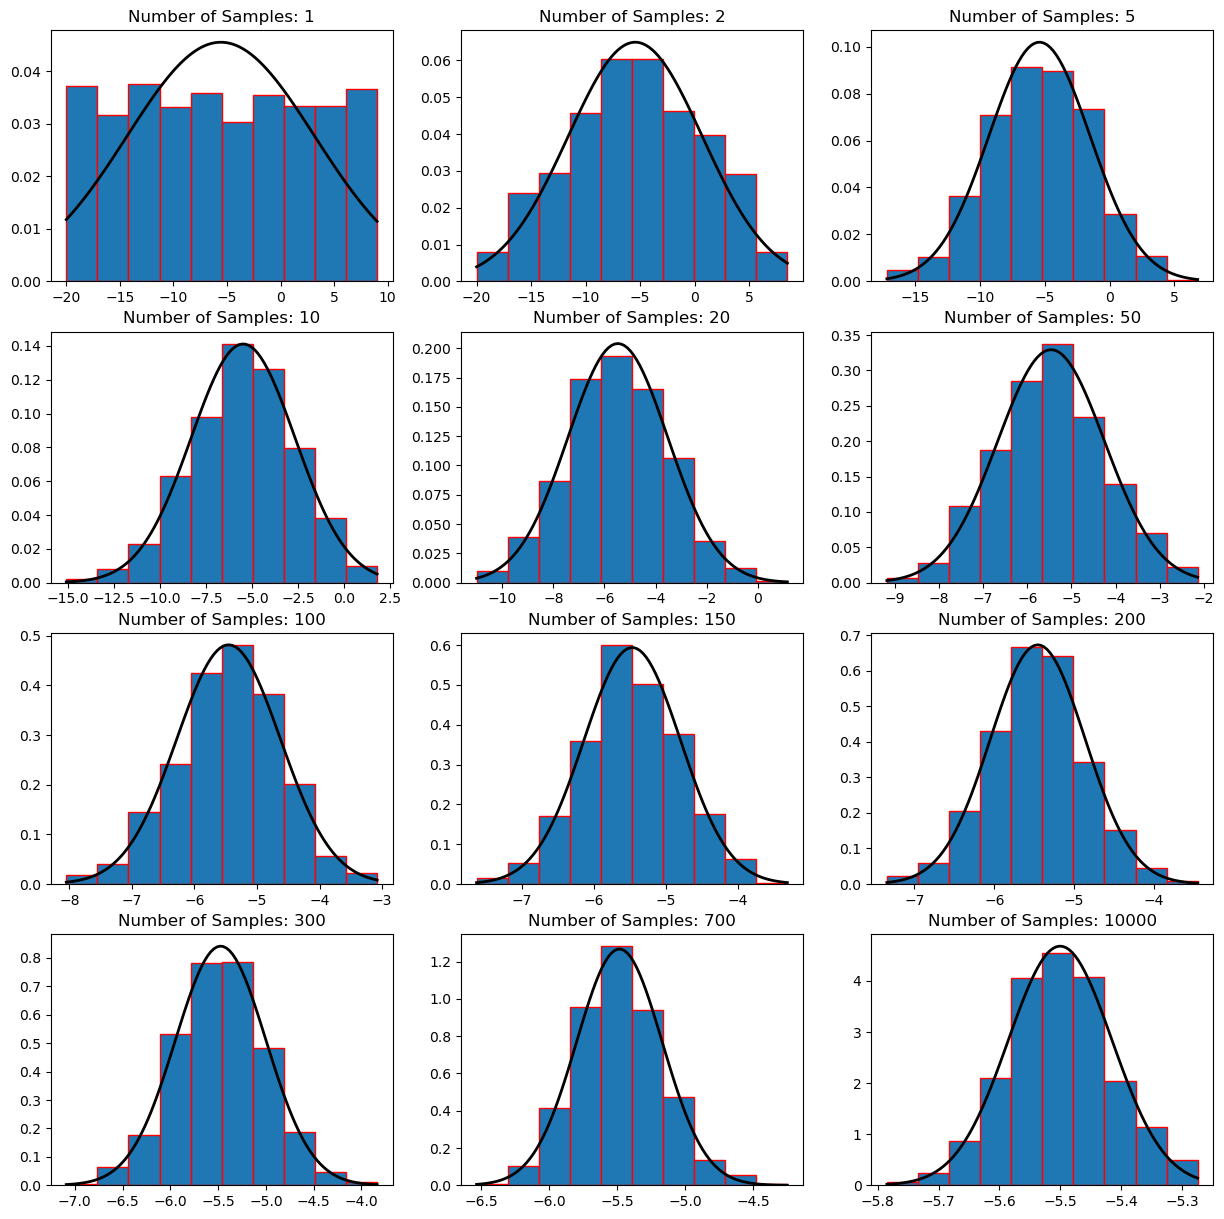

In [25]:
import matplotlib.mlab as mlab
from scipy.stats import norm

num_samples = [1, 2, 5, 10, 20, 50, 100, 150, 200, 300, 700, 10000] 
means = [] 
a = -20; b=10
for j in num_samples:
    np.random.seed(1)
    x = [np.mean(np.random.randint(a, b, j)) for _i in range(1000)]
    means.append(x)
k=0
bins = 30
fig, ax = plt.subplots(4, 3, figsize =(15, 15))
for i in range(0, 4):
    for j in range(0, 3):
        ax[i, j].hist(means[k], density = True, edgecolor='red')
        mu, std = norm.fit(means[k])
        x = np.linspace(min(means[k]), max(means[k]), 100)
        p = norm.pdf(x, mu, std)
        ax[i, j].plot(x, p, 'k', linewidth=2)
        ax[i, j].set_title(label = f'Number of Samples: {num_samples[k]}')
        k = k + 1
plt.show()